In [1]:
import pandas as pd
from mlflow.tracking import MlflowClient
import numpy as np

from matplotlib import pyplot as plt
from src.data_analysis.analysis_helpers import get_run_ids, get_labeledSamples_avgAcc, get_out_dirs
from src.database.mlflow import MLFlowClient
from src.database.mlflow import MLFlowClient
%matplotlib inline
# %pylab

import sys
import glob
sys.path.append('../')

from mlflow.tracking import MlflowClient
from src.database.mlflow import MLFlowClient
db = MLFlowClient(tracking_uri="http://mlflow.dbs.ifi.lmu.de:5000/", experiment_name="DMBAL")
tracking = MlflowClient()

/Users/ilijanaspasojevic/PycharmProjects/dmbal/src/data_analysis/analysis_helpers.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  from pandas import np


In [2]:
runs_bp_smo = db.get_entries(['params.diversity_strategy', "params.uncertainty", "params.clustering", "params.number_clusters","params.max_epochs", "params.learning_rate", "params.optimizer", "params.beta"],[True, True, True, True, True, True, True, True],["bp_smo_canceled", "least_confident", "w_kmeans",10, 30, 0.01, "Adam",10])
print(len(runs_bp_smo))
#all_run_ids_smo = get_run_ids(runs_bp_smo)
run_ids_smo = get_run_ids(runs_bp_smo.head(5))
#nochmal mit tail ausgeben und schauen, ob es einen großen Unterschied macht

10


In [3]:
runs_bp_lmo = db.get_entries(['params.diversity_strategy', "params.uncertainty", "params.clustering", "params.max_epochs", "params.learning_rate", "params.beta"],[True, True, True, True, True, True],["bp_lmo_canceled", "least_confident", "w_kmeans", 30, 0.01, 10])
print(len(runs_bp_lmo))
#run_ids_bp_lmo = get_run_ids(runs_bp_lmo)
run_ids_bp_lmo = get_run_ids(runs_bp_lmo.head(5))
run_ids_bp_lmo

10


0    161dbbb5603a4cacbf25c19dfe0c6e04
1    6bd221d36c4643a891f2b9372f7eec2a
2    e5c0e13b79514c0ba9eb7dac96febce0
3    e114ab8981d84324b161a4af0a3bdbe9
4    b3671c68b1a64565b2b8dd67e4dd379a
Name: run_id, dtype: object

In [4]:
runs_centroids = db.get_entries(['params.diversity_strategy', "params.uncertainty", "params.clustering", "params.k","params.max_epochs", "params.learning_rate", "params.optimizer", "params.beta"],[True, True, True, True, True, True, True, True],["centroids", "least_confident", "w_kmeans",1000, 30, 0.01, "Adam", 10])
print(len(runs_centroids))
#run_ids_centroids = get_run_ids(runs_centroids)
run_ids_centroids = get_run_ids(runs_centroids.head(5))
run_ids_centroids

10


0    2e96fecdd5904b6483c8c02d216a4f71
1    8f22417afa90455083fddd4bd508ca78
2    19700c8699754d75970866deadbcbbac
3    6fab6f07b36642bea8aba4e0f26d8a2a
4    85ecc7f6544e4ce2a8555ec3d5c9c39e
Name: run_id, dtype: object

In [5]:
runs_bp_clusterwise = db.get_entries(['params.diversity_strategy', "params.uncertainty", "params.clustering", "params.k","params.max_epochs", "params.learning_rate", "params.number_clusters", "params.beta"],[True, True, True, True, True, True, True, True],["bp_prop_clustersize", "least_confident", "w_kmeans",1000, 30, 0.01, 10, 10])
print(len(runs_bp_clusterwise))
#run_ids_bp_clusterwise = get_run_ids(runs_bp_clusterwise)
run_ids_bp_clusterwise = get_run_ids(runs_bp_clusterwise.head(5))
run_ids_bp_clusterwise

10


0    4741245adc60460581b7f975e4de69cb
1    b95251e4ef094115a94fa8a5bd9419b8
2    da596fe1221a4646b1420759413f2871
3    92f0c3936f8a48dd9f591e9002cc2d06
4    fb9d1fec16be487388c45b829d9058b9
Name: run_id, dtype: object

In [6]:
runs_boundary = db.get_entries(['params.diversity_strategy', "params.uncertainty", "params.clustering", "params.k", "params.learning_rate", "params.max_epochs", "params.number_clusters", "params.beta"],[True, True, True, True, True, True, True, True],["boundary_points", "least_confident", "w_kmeans",1000, 0.01, 30, 10, 10])
print(len(runs_boundary))
#run_ids_boundary = get_run_ids(runs_boundary)
run_ids_boundary = get_run_ids(runs_boundary.head(5))
run_ids_boundary

10


0    df7e3c05f8ff4704a69716f246a8ea10
1    eebcec36e1c341628c051a1e52b4109b
2    3f0f68d609714118b4677f98d8c82963
3    b71b18bbbbca4de98210d52682068368
4    4c2a5208469d424490b35453b992f760
Name: run_id, dtype: object

In [7]:
runs_random = db.get_entries(['params.diversity_strategy', "params.learning_rate", "params.max_epochs", "params.sampling_size"],[True, True, True, True],["random", 0.01, 30, 1000])
print(len(runs_random))
#run_ids_random = get_run_ids(runs_random)
run_ids_random = get_run_ids(runs_random.head(5))
run_ids_random

10


0    7f1e5628b6334cc3a9de37e61104358d
1    421ff61556e5461f97a973fa111c3c63
2    ae5681ec87874fbda5bd998ad8c13970
3    1437f6a0f73a4039ad88d8c63b54f84c
4    d2a0054c9b594e3cb78e9adb27ac6157
Name: run_id, dtype: object

In [8]:
runs_random_uncertainty = db.get_entries(['params.diversity_strategy', "params.learning_rate", "params.max_epochs", "params.sampling_size", "params.beta", "params.uncertainty"],[True, True, True, True, True, True],["random_uncertainty", 0.01, 30, 1000, 10, "least_confident"])
print(len(runs_random_uncertainty))
#run_ids_random = get_run_ids(runs_random)
run_ids_random_uncertainty = get_run_ids(runs_random_uncertainty.head(5))
run_ids_random_uncertainty

10


0    3e4aa56c74f040419a3e10478a8821ef
1    f638f1adedb34f3983bd522bb6355803
2    d66f99ac1d23433e87965cff999908ab
3    892d80c15a5540989f0205fc8a1e43a1
4    b82bdc76575748129621c2524d083563
Name: run_id, dtype: object

In [9]:
samples_labeled_bp_smo, avg_accs_bp_smo = get_labeledSamples_avgAcc(run_ids_smo, tracking)
samples_labeled_bp_lmo, avg_accs_bp_lmo = get_labeledSamples_avgAcc(run_ids_bp_lmo, tracking)
samples_labeled_centroids, avg_accs_centroids = get_labeledSamples_avgAcc(run_ids_centroids, tracking)
samples_labeled_clusterwise, avg_accs_clusterwise = get_labeledSamples_avgAcc(run_ids_bp_clusterwise, tracking)
samples_labeled_boundary, avg_accs_boundary = get_labeledSamples_avgAcc(run_ids_boundary, tracking)
samples_labeled_random, avg_accs_random = get_labeledSamples_avgAcc(run_ids_random, tracking)
samples_labeled_random_uncertain, avg_accs_random_uncertain = get_labeledSamples_avgAcc(run_ids_random_uncertainty, tracking)

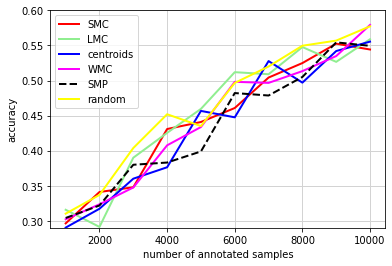

In [10]:
# plot
plt.plot(samples_labeled_bp_smo, avg_accs_bp_smo,color='red', label='SMC', linewidth=2)
plt.plot(samples_labeled_bp_lmo, avg_accs_bp_lmo,color='lightgreen', label='LMC', linewidth=2)
plt.plot(samples_labeled_centroids, avg_accs_centroids,color='blue', label='centroids', linewidth=2)
plt.plot(samples_labeled_clusterwise, avg_accs_clusterwise,color='magenta', label='WMC', linewidth=2)
plt.plot(samples_labeled_boundary, avg_accs_boundary,color='black', label='SMP', linestyle='--',linewidth=2)
plt.plot(samples_labeled_random, avg_accs_random,color='yellow', label='random',linewidth=2)
plt.legend()
plt.xlabel('number of annotated samples')
plt.ylabel('accuracy')
plt.grid(b=True, color='lightgrey', linestyle='-', linewidth=1)
plt.ylim([0.29, 0.60])

plt.show()

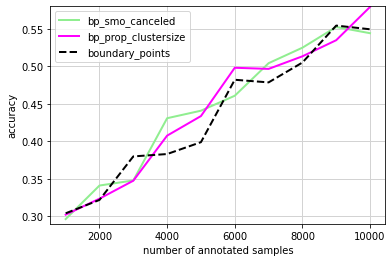

In [11]:
plt.plot(samples_labeled_bp_smo, avg_accs_bp_smo,color='lightgreen', label='bp_smo_canceled', linewidth=2)
plt.plot(samples_labeled_clusterwise, avg_accs_clusterwise,color='magenta', label='bp_prop_clustersize', linewidth=2)
plt.plot(samples_labeled_boundary, avg_accs_boundary,color='black', label='boundary_points', linestyle='--',linewidth=2)
plt.legend()
plt.xlabel('number of annotated samples')
plt.ylabel('accuracy')
plt.grid(b=True, color='lightgrey', linestyle='-', linewidth=1)
plt.ylim([0.29, 0.58])

plt.show()

In [12]:
print(f'bp_smo: {avg_accs_bp_smo}')
print(f'bp_lmo: {avg_accs_bp_lmo}')

bp_smo: [0.2963  0.34104 0.3478  0.43082 0.44084 0.46078 0.5042  0.52486 0.5525
 0.5442 ]
bp_lmo: [0.3157  0.29128 0.38994 0.42536 0.45954 0.51188 0.50894 0.54766 0.52658
 0.55886]


In [13]:
avg_accs_centroids

array([0.29026, 0.31718, 0.36002, 0.3763 , 0.45666, 0.4475 , 0.5277 ,
       0.49696, 0.542  , 0.5554 ])

In [14]:
avg_accs_boundary

array([0.304  , 0.32184, 0.37988, 0.38304, 0.39886, 0.4821 , 0.4786 ,
       0.50506, 0.55436, 0.54944])

In [15]:
avg_accs_bp_smo

array([0.2963 , 0.34104, 0.3478 , 0.43082, 0.44084, 0.46078, 0.5042 ,
       0.52486, 0.5525 , 0.5442 ])

In [16]:
avg_accs_bp_lmo

array([0.3157 , 0.29128, 0.38994, 0.42536, 0.45954, 0.51188, 0.50894,
       0.54766, 0.52658, 0.55886])

In [17]:
avg_accs_clusterwise

array([0.30218, 0.3235 , 0.34748, 0.40758, 0.43368, 0.4981 , 0.4966 ,
       0.51336, 0.53486, 0.57924])

In [18]:
avg_accs_random

array([0.31016, 0.33688, 0.40374, 0.45186, 0.43506, 0.49656, 0.51994,
       0.54958, 0.55688, 0.57726])

In [19]:
avg_accs_random_uncertain

array([0.29812, 0.30822, 0.40064, 0.43942, 0.4214 , 0.46528, 0.50886,
       0.5347 , 0.55396, 0.55926])